# Smith Kaart Oefening 7

## Opgave Oefening


Een baantje op een PCB heeft een karakteristieke impedantie van 64 Ohm. Gebruik je Smith kaart om een belasting bestaande uit een resistief deel van 32 Ohm en een capacitief deel van 5 pF in parallel aan te passen aan dit baantje voor een frequentie van  500 MHz ($\lambda_{PCB}$= 328 mm) door het gebruik van een open stukje transmissielijn van de juiste lengte aangebracht op de juiste positie. Bereken deze lengte en positie.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skrf as rf
import schemdraw
import schemdraw.elements as elm

## Oplossing

We werken de oplossing uit op basis van <cite id="btvbi"><a href="#zotero|11916217/DBHE7Y8H">[1]</a></cite>.


We plaatsen de waarde van $Y_L Z_o$ (dit is 2 + j 1) op de Smith kaart van de admitantie en we draaien tot we de cirkel waarbij het reele deel van admitantie 1 is tegenkomen. Dit ziet er uit als in {numref}`smith71`. 

In [ ]:
64*(1/32+2*np.pi*500e6j*5e-12)

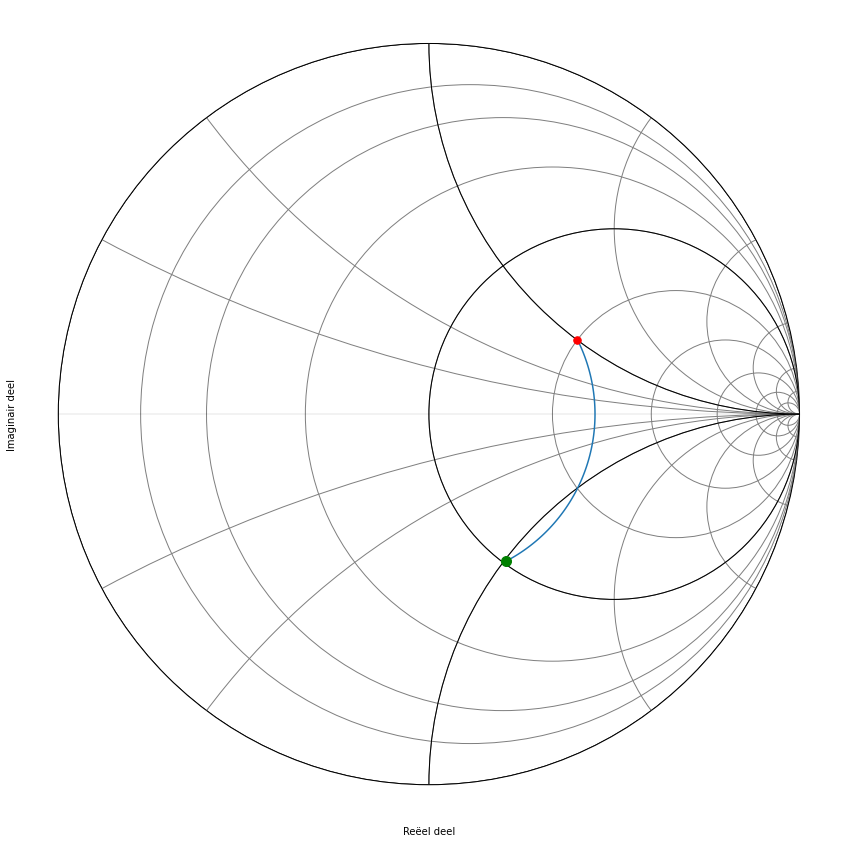

In [17]:
Z_L = 1/(1/32+2*np.pi*500e6j*5e-12)
Z_0 = 64
f_0_str = '0.5GHz'
freq = rf.Frequency(start=0.48, stop=0.52, npoints=5, unit='GHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
def smitplot(zlijn,Z_0,tt='z'):
    gamma=[(zl-Z_0)/(zl+Z_0) for zl in zlijn]
    fig,ax=plt.subplots(figsize=(25,15))
    rf.plotting.plot_smith(gamma, chart_type=tt, x_label=r"Reëel deel", y_label='Imaginair deel', title='',ax=ax)
    ax.plot([gamma[-1].real],[gamma[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gamma[0].real],[gamma[0].imag],color='red', marker=".", markersize=15)
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,90)]
smitplot(ylijn,Y_0)

```{figure} ./images/mpl.svg
---
name: smith71
---
Smith kaart van de admitantie
```

In [ ]:
1/64

We kijken nu welke hoek we moeten draaien om deze cirkel te snijden. 
Aangezien de opgave was om dit zo kort mogelijk bij de belasting te doen, kiezen we voor het eerste snijpunt.
Op de kaart lezen we af dat dit na 90  graden is. We hebben dus een stukje van 41.0 mm nodig. In de tabel hieronder zien we dit in meer detail uitgewerkt. Hiervoor kijken we na wanneer de admitantie 1/(64 Ohm) bereikt. Dit is bij 15.625 mS.


In [19]:
ylijnpp=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(88,92)]
def ylijnprint(ylijn,golflengte=32.8):
    print('hoek    admitantie (Siemens)     lengte baantje op PCB (cm)')
    for i,yi in ylijn:
        print('{:4}    Y= {:-.2f}{:+.2f}j mS            lengte={:.2f} cm'.format(i,yi.real*1000,yi.imag*1000, i/360*golflengte/2))
ylijnprint(ylijnpp)

hoek    admitantie (Siemens)     lengte baantje op PCB (cm)
  88    Y= 16.19-15.94j mS            lengte=4.01 cm
  89    Y= 15.90-15.80j mS            lengte=4.05 cm
  90    Y= 15.62-15.67j mS            lengte=4.10 cm
  91    Y= 15.36-15.53j mS            lengte=4.15 cm


In [ ]:
-6.48/1000*50

Het imaginair gedeelte van de y waarde die we op de kaart aflezen is y=-1 j. We moeten dit dus compenseren door een imaginair deel van y=+1 j van de open transmissielijn.
We starten dus de cirkelboog bij y=0 (zie oranje lijn in {numref}`smith72`) en kijken waar deze de waarde van y=+1 j snijdt op de Smith kaart. De lengte van de boog die we hiervoor nodig hebben is 90 graden. Dit komt ook overeen met een lengte van 41.0 mm.

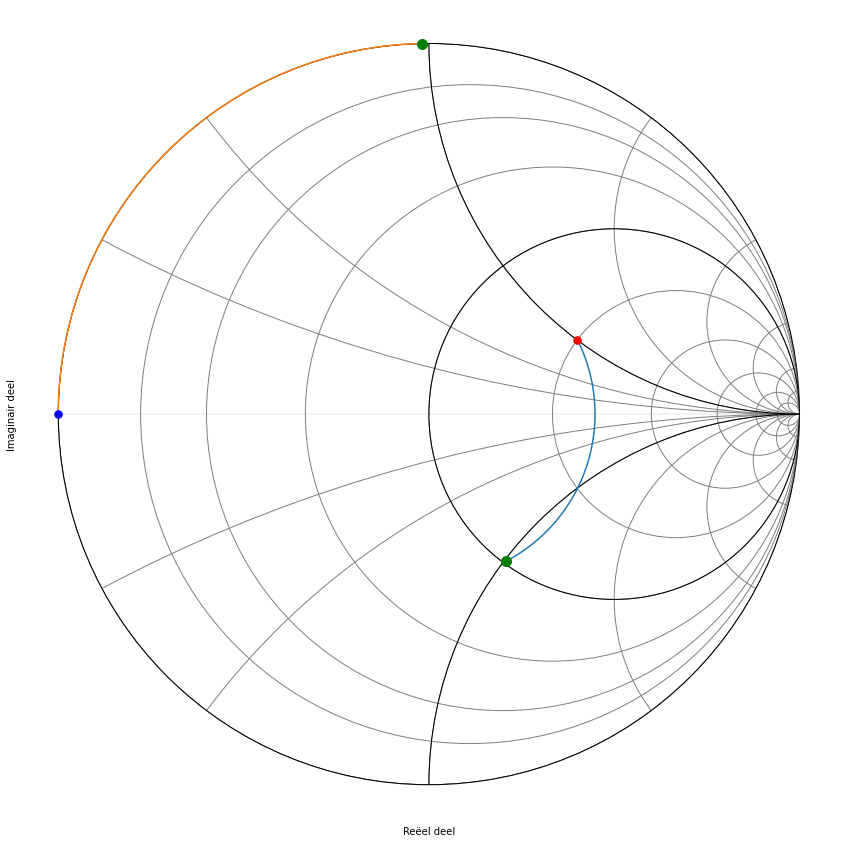

In [20]:
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
yopenlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,90)]

def smitplot2(ylijn,yopenlijn,Y_0):
    gamma=[(yl-Y_0)/(yl+Y_0) for yl in ylijn]
    gammaopen=[(yl-Y_0)/(yl+Y_0) for yl in yopenlijn]
    fig,ax=plt.subplots(figsize=(25,15))
    rf.plotting.plot_smith(gamma, x_label=r"Reëel deel", y_label='Imaginair deel', title='',ax=ax)
    ax.plot([g.real for g in gammaopen],[g.imag for g in gammaopen])
    ax.plot([gamma[-1].real],[gamma[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gamma[0].real],[gamma[0].imag],color='red', marker=".", markersize=15)
    ax.plot([gammaopen[-1].real],[gammaopen[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gammaopen[0].real],[gammaopen[0].imag],color='blue', marker=".", markersize=15)
smitplot2(ylijn,yopenlijn,Y_0)

```{figure} ./images/mpl.svg
---
name: smith72
---
Smith kaart van de admitantie met ook de aangave van de open transmissielijn.
```

We kunnen dit ook in tabelvorm uitwerken. Ook hier zoeken we een waarde van 15.625j mS Dit zie je dan hieronder weergegeven.

In [10]:
yopenlijn=[(i,1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(85,95)]

def ylijnprint2(ylijn,golflengte=32.8):
    print('hoek    admitantie (Siemens)     lengte coax (cm)')
    for i,yi in ylijn:
        print('{:4}       Y= {:+.2f}j mS     lengte={:.2f} cm'.format(i,yi.imag*1000, i/360*golflengte/2))

ylijnprint2(yopenlijn)

hoek    admitantie (Siemens)     lengte coax (cm)
  85       Y= +14.32j mS     lengte=3.87 cm
  86       Y= +14.57j mS     lengte=3.92 cm
  87       Y= +14.83j mS     lengte=3.96 cm
  88       Y= +15.09j mS     lengte=4.01 cm
  89       Y= +15.35j mS     lengte=4.05 cm
  90       Y= +15.63j mS     lengte=4.10 cm
  91       Y= +15.90j mS     lengte=4.15 cm
  92       Y= +16.18j mS     lengte=4.19 cm
  93       Y= +16.47j mS     lengte=4.24 cm
  94       Y= +16.76j mS     lengte=4.28 cm


{numref}`smith7cir` toont het schema dat we nodig hebben om deze oplossing te realiseren

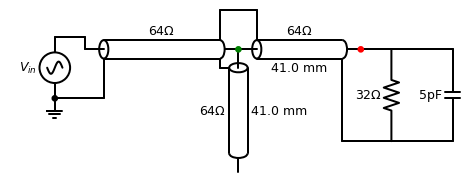

In [33]:
d = schemdraw.Drawing()
d.add(elm.Ground())
d.add(elm.Dot)
bron=d.add(elm.SourceSin(l=2.0,d='up', label='$V_{in}$'))
d.add(elm.Line(l=1,d='right') )
d.add(elm.Line(l=0.4,d='down') )
coax1=d.add(elm.coax(d='right',length=5, label='$64\Omega$'))
d.add(elm.Dot,color='g')
coax3=d.add(elm.coax(xy=coax1.end,d='down',l=1.5,length=4, label='$64\Omega$', botlabel='41.0 mm'))
d.add(elm.Line(xy=coax1.shieldend,toy=coax3.shieldstart_top,d='down'))
d.add(elm.Line(tox=coax3.shieldstart,d='right'))

coax2=d.add(elm.coax(xy=coax1.end,d='right',l=1.5,length=4, label='$64\Omega$', botlabel='41.0 mm'))
d.add(elm.Dot,color='r')

d.add(elm.Line(xy=coax2.end,d='right',l=1 ))  
RL=d.add(elm.Resistor(d='down',label='32Ω'))
d.add(elm.Line(xy=RL.start,d='right',l=2 )) 
d.add(elm.Capacitor(d='down',label='5pF'))
d.add(elm.Line(tox=RL.end,d='left' )) 
d.add(elm.Line(xy=coax2.shieldend,toy=RL.end,d='down' )) 
d.add(elm.Line(tox=RL.end,d='right' )) 


d.add(elm.Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(elm.Line(tox=coax2.shieldstart_top,d='right') )     
d.add(elm.Line(toy=coax2.shieldstart_top,d='down') )     
d.add(elm.Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(elm.Line(toy=coax1.shieldstart,d='up') )
d.draw()

```{figure} ./images/mpl.svg
---
name: smith7cir
---
circuit van de aangepaste antenne
```

## Referenties

<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry"><i id="zotero|11916217/DBHE7Y8H"></i>
    <div class="csl-left-margin">1.</div><div class="csl-right-inline">Alexander Arsenovic, Julien Hillairet, Jackson Anderson, Henrik Forsten, Vincent Ries, M. Eller, N. Sauber, R. Weikle, W. Barnhart, &#38; F. Forstmayr, scikit-rf: An Open Source Python Package for Microwave Network Creation, Analysis, and Calibration [Speaker’s Corner]. <i>IEEE Microwave Magazine</i>, <b>23</b> (2022) 98–105. https://doi.org/10.1109/MMM.2021.3117139.</div>
  </div>
</div>
<!-- BIBLIOGRAPHY END -->